### **라이브러리 Import 하기**

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

### **X and Y data (given)**

In [ ]:
x_train = [1, 2, 3, 4, 5]
#y_train = [3.1, 5.3, 7.2, 9.5, 11.7] #noise 다르게 주기
#y_train = [2, 4, 6, 8, 10] #2x
y_train = [5.1, 7.2, 9.3, 11.4, 13.5] #y = 2.1x + 3

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

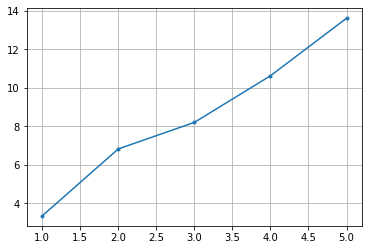

In [ ]:
plt.plot(x_train, y_train,'.-')
plt.grid()

### **Initialization**

In [ ]:
useRandom = False

In [ ]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 2.0;
    b0 = 3.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

### **Our hypothesis**

$$ H(x)=Wx + b $$



In [ ]:
hypothesis = x_train * W + b

cost/loss function 정의하기


*   loss of one training example :

$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2$$

In [ ]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

### **Optimizer**

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

### **Launch the graph in a session**

In [ ]:
sess = tf.Session()

### **Initializes global variables in the graph.**

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
nb_epoch = 1001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list
for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    w1 = sess.run(W)[0]
    b1 = sess.run(b)[0]
    vloss.append(loss1)
    vw.append(w1)
    vb.append(b1)

    if step % 50 == 0: # 5번마다
        
        print(step,'\t', loss1, '\t', w1, '\t',b1)

0 	 0.76365507 	 1.9882014 	 2.9903252
50 	 0.5788102 	 2.0204988 	 2.7050831
100 	 0.46415502 	 2.0843887 	 2.4744194
150 	 0.38243786 	 2.1383266 	 2.279686
200 	 0.32419652 	 2.1838624 	 2.115287
250 	 0.28268707 	 2.222305 	 1.9764975
300 	 0.25310278 	 2.254759 	 1.8593282
350 	 0.23201713 	 2.2821577 	 1.7604101
400 	 0.21698923 	 2.3052886 	 1.6769009
450 	 0.20627847 	 2.324816 	 1.6064
500 	 0.19864461 	 2.341302 	 1.546881
550 	 0.19320402 	 2.3552194 	 1.4966342
600 	 0.18932624 	 2.3669689 	 1.4542143
650 	 0.18656266 	 2.3768885 	 1.4184026
700 	 0.18459292 	 2.3852627 	 1.3881689
750 	 0.18318906 	 2.3923323 	 1.362645
800 	 0.1821885 	 2.3983006 	 1.3410972
850 	 0.18147537 	 2.4033396 	 1.3229058
900 	 0.18096712 	 2.407593 	 1.3075482
950 	 0.18060488 	 2.4111848 	 1.2945828
1000 	 0.18034671 	 2.4142163 	 1.2836372


Text(0, 0.5, 'loss')

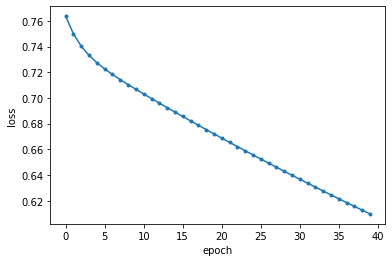

In [ ]:
plt.plot(vloss[:40],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

TODO: w, b의 epoch 에 따른 변화 그래프 넣기 !

Text(0, 0.5, 'w1')

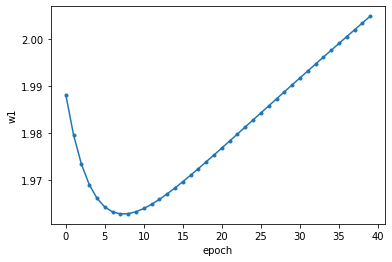

In [ ]:
plt.plot(vw[:40],'.-') #변화를 좀 더 살펴보기 위해 갯수를 40개로 늘려서 찍어봄
plt.xlabel('epoch')
plt.ylabel('w1')

Text(0, 0.5, 'b1')

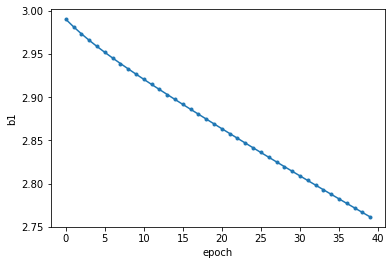

In [ ]:
plt.plot(vb[:40],'.-') #변화를 좀 더 살펴보기 위해 갯수를 40개로 늘려서 찍어봄
plt.xlabel('epoch')
plt.ylabel('b1')

**학습완료**

In [ ]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

출력해보기

In [ ]:
print(w1, b1)

2.4142163 1.2836372


In [ ]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 2.4142163x + 1.2836372


Text(0.5, 1.0, 'y = 2.4142163x + 1.2836372')

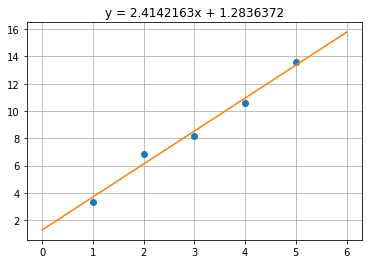

In [ ]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)